In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%%time

# Importing training dataset
df_train = pd.read_csv('fashion-mnist_train.csv')

# Importing test dataset
df_test = pd.read_csv('fashion-mnist_test.csv')

Wall time: 7.66 s


In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [7]:
# Each training and test example is assigned to one of the following labels:

target_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Creating independent variable and target variable

X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

test_X = df_test.iloc[:, 1:]
test_y = df_test.iloc[:, 0]

In [9]:
from keras.utils.np_utils import to_categorical

# One-hot encoding for target variable
y = to_categorical(y = y, num_classes = 10)

Using TensorFlow backend.


In [10]:
# Feature Scaling

X = X / 255

test_X = test_X / 255

In [11]:
# Reshape feature matrix into 3 dimension array
# Height = 28px, Width = 28px , Channel = 1 (1 = grayscale)

X = X.values.reshape(-1, 28, 28, 1)

test_X = test_X.values.reshape(-1, 28, 28, 1)

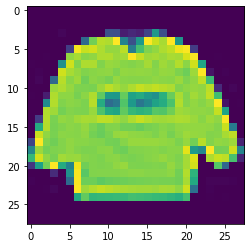

In [12]:
# Display 1st image

plt.imshow(X[0][:, :, 0])

In [13]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
# Importing the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
# Initialising the CNN

classifier = Sequential()

In [17]:
# Convolution

classifier.add(
    Convolution2D(
        filters = 32, 
        kernel_size = (3, 3), 
        input_shape = (28, 28, 1),
        activation = 'relu'
    )
)

# # Pooling

classifier.add(
    MaxPooling2D(pool_size = (2, 2))
)

classifier.add(Dropout(0.25))

# Adding a second convolutional layer

classifier.add(
    Convolution2D(
        filters = 64, 
        kernel_size = (3, 3), 
        activation = 'relu'
    )
)

classifier.add(
    MaxPooling2D(pool_size = (2, 2)
    )
)

classifier.add(Dropout(0.25))

# Adding a third convolutional layer

classifier.add(
    Convolution2D(
        filters = 128, 
        kernel_size = (3, 3), 
        activation = 'relu'
    )
)

classifier.add(
    MaxPooling2D(pool_size = (2, 2)
    )
)

classifier.add(Dropout(0.25))

# Flattening

classifier.add(Flatten())

In [17]:
# Full connection

classifier.add(
    Dense(input_dim = 784, units = 256, activation = 'relu')
)

classifier.add(keras.layers.BatchNormalization(axis = 1))

classifier.add(Dropout(0.3))

classifier.add(
    Dense(units = 10, activation = 'softmax')
)

In [17]:
optimizer = keras.optimizers.Adam(lr = 0.0001)

# Compiling the CNN

classifier.compile(
    optimizer = optimizer, 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [25]:
%%time
# Fitting data to classifier
history = classifier.fit(
    x = X_train, y = y_train, 
    batch_size = 128, 
    epochs = 50, 
    verbose = 1, 
    validation_data = (X_test, y_test)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 38s 786us/step - loss: 1.3796 - acc: 0.4991 - val_loss: 0.8222 - val_acc: 0.7142
Epoch 2/50
48000/48000 [==============================] - 29s 597us/step - loss: 0.8333 - acc: 0.6931 - val_loss: 0.6735 - val_acc: 0.7515
Epoch 3/50
48000/48000 [==============================] - 29s 596us/step - loss: 0.7259 - acc: 0.7288 - val_loss: 0.6141 - val_acc: 0.7690
Epoch 4/50
48000/48000 [==============================] - 28s 593us/step - loss: 0.6671 - acc: 0.7491 - val_loss: 0.5697 - val_acc: 0.7954
Epoch 5/50
48000/48000 [==============================] - 29s 595us/step - loss: 0.6236 - acc: 0.7680 - val_loss: 0.5414 - val_acc: 0.8007
Epoch 6/50
48000/48000 [==============================] - 30s 615us/step - loss: 0.5893 - acc: 0.7826 - val_loss: 0.5049 - val_acc: 0.8140
Epoch 7/50
48000/48000 [==============================] - 33s 693us/step - loss: 0.5567 - acc: 0.7954 - val_loss: 0.

In [26]:
print(f'Max Validation Accuracy = {max(history.history["val_acc"]):.4f}')
print(f'Min Validation Loss = {min(history.history["val_loss"]):.4f}')

Max Validation Accuracy = 0.8995
Min Validation Loss = 0.2765


In [28]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 15, 10

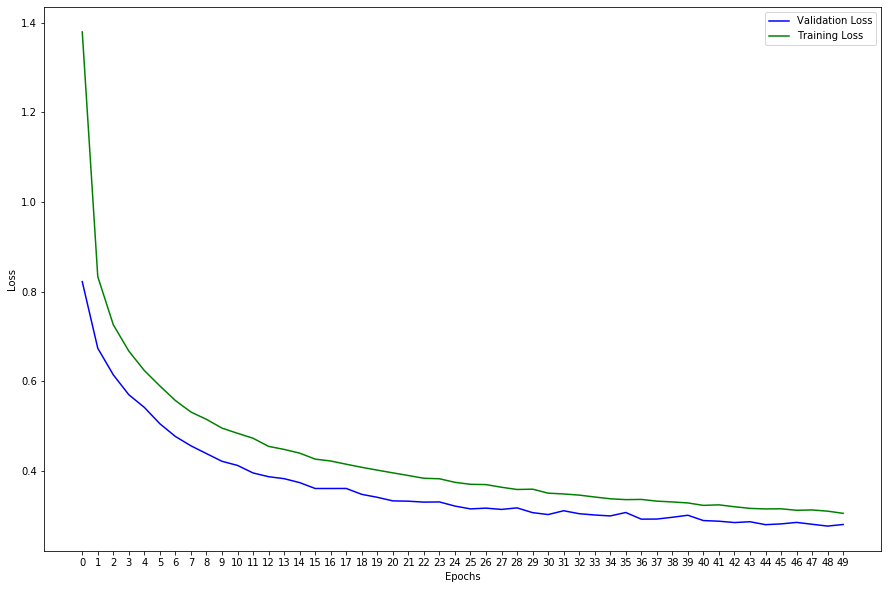

In [29]:
plt.plot(history.epoch, history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.plot(history.epoch, history.history['loss'], color = 'green', label = 'Training Loss')
plt.xticks(np.arange(min(history.epoch), max(history.epoch) + 1, 1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

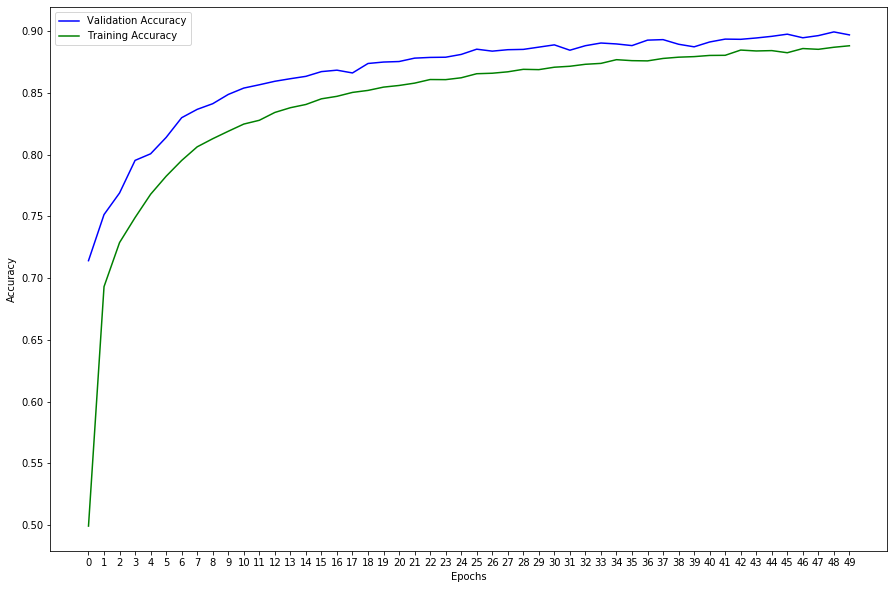

In [30]:
plt.plot(history.epoch, history.history['val_acc'], color = 'blue', label = 'Validation Accuracy')
plt.plot(history.epoch, history.history['acc'], color = 'green', label = 'Training Accuracy')
plt.xticks(np.arange(min(history.epoch), max(history.epoch) + 1, 1))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# Test set predictions

test_set_predictions = classifier.predict(test_X)

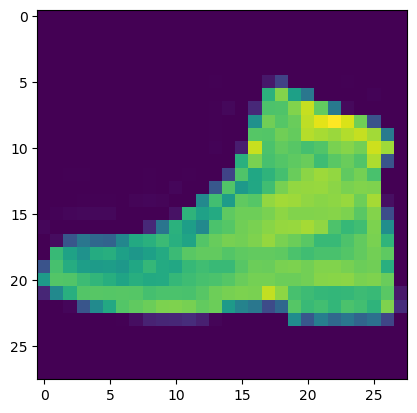

In [55]:
# Display 80th record from test set

plt.imshow(test_X[80][:, :, 0])

In [56]:
# Predict label for 80th record from test set

target_labels[np.argmax(test_set_predictions[80])]

'Ankle boot'

In [57]:
# Get the labels for test set predictions

test_set_predictions = np.argmax(test_set_predictions, axis = 1)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [59]:
print(f'ACCURACY = {accuracy_score(test_y, test_set_predictions) * 100:.3f}%')

ACCURACY = 90.330%


In [60]:
cm = confusion_matrix(test_y, test_set_predictions)

In [61]:
# Convert confusion matrix into a dataframe

df_confusion_matrix = pd.DataFrame(
    data = cm, 
    index = ['Actual Class - T-shirt/top', 'Actual Class - Trouser', 'Actual Class - Pullover', 'Actual Class - Dress', 
             'Actual Class - Coat', 'Actual Class - Sandal', 'Actual Class - Shirt', 'Actual Class - Sneaker', 
             'Actual Class - Bag', 'Actual Class - Ankle boot'],
    columns = ['Predicted Class - T-shirt/top', 'Predicted Class - Trouser', 'Predicted Class - Pullover', 
               'Predicted Class - Dress', 'Predicted Class - Coat', 'Predicted Class - Sandal', 'Predicted Class - Shirt', 
               'Predicted Class - Sneaker', 'Predicted Class - Bag', 'Predicted Class - Ankle boot']
)

In [62]:
df_confusion_matrix

,Predicted Class - T-shirt/top,Predicted Class - Trouser,Predicted Class - Pullover,Predicted Class - Dress,Predicted Class - Coat,Predicted Class - Sandal,Predicted Class - Shirt,Predicted Class - Sneaker,Predicted Class - Bag,Predicted Class - Ankle boot
Actual Class - T-shirt/top,828,1,24,23,3,0,116,0,5,0
Actual Class - Trouser,0,980,5,10,2,1,2,0,0,0
Actual Class - Pullover,9,0,842,14,52,1,80,0,2,0
Actual Class - Dress,10,3,12,925,23,0,26,0,0,1
Actual Class - Coat,0,0,26,21,836,0,117,0,0,0
Actual Class - Sandal,1,0,0,1,0,944,1,36,2,15
Actual Class - Shirt,74,1,50,30,61,0,781,0,3,0
Actual Class - Sneaker,0,0,0,0,0,2,0,963,0,35
Actual Class - Bag,1,0,9,1,1,4,10,1,972,1
Actual Class - Ankle boot,0,0,0,0,0,1,0,37,0,962


In [63]:
# Classification report

pd.DataFrame(classification_report(test_y, test_set_predictions, target_names = target_labels, output_dict = True))

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,accuracy,macro avg,weighted avg
f1-score,0.861154,0.987406,0.855691,0.913580,0.845298,0.966718,0.732302,0.945508,0.979839,0.955313,0.9033,0.904281,0.904281
precision,0.897075,0.994924,0.869835,0.902439,0.854806,0.990556,0.689320,0.928640,0.987805,0.948718,0.9033,0.906412,0.906412
recall,0.828000,0.980000,0.842000,0.925000,0.836000,0.944000,0.781000,0.963000,0.972000,0.962000,0.9033,0.903300,0.903300
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.9033,10000.000000,10000.000000
